In [108]:
import random 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [52]:
df = pd.read_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/SubjectInformation - SubjectInformation.csv')

In [53]:
df.head(5)

,Subjects,Gender,Affected_Side,Age,Mass,Time_Since_Stroke,FuglMeyer,Step_counts,Speed
0,s1,M,L,59,124.28,182,32,360,11600
1,s2,F,R,73,70.76,101,26,288,8616
2,s3,M,L,59,91.62,77,25,291,7900
3,s4,M,L,55,95.25,46,32,284,10086
4,s5,M,L,49,113.85,83,25,237,7000


In [54]:
df.dtypes

Subjects              object
Gender                object
Affected_Side         object
Age                    int64
Mass                 float64
Time_Since_Stroke      int64
FuglMeyer              int64
Step_counts            int64
Speed                  int64
dtype: object

In [55]:
df['Speed'] = round(df['Speed']/10000,4)

In [56]:
df.head(10)

,Subjects,Gender,Affected_Side,Age,Mass,Time_Since_Stroke,FuglMeyer,Step_counts,Speed
0,s1,M,L,59,124.28,182,32,360,1.1600
1,s2,F,R,73,70.76,101,26,288,0.8616
2,s3,M,L,59,91.62,77,25,291,0.7900
3,s4,M,L,55,95.25,46,32,284,1.0086
4,s5,M,L,49,113.85,83,25,237,0.7000
5,s6,M,L,53,102.05,52,21,209,0.5860
6,s7,M,L,56,78.02,29,19,234,0.4373
7,s8,M,L,71,78.02,59,24,282,0.7880
8,s9,F,L,52,78.02,43,26,234,0.7003
9,s10,F,R,33,81.10,108,27,314,1.2500


In [183]:
def set_missing_data(data1, data2, missing_locations):
    for i in missing_locations:
        missing_length = int(np.random.randint(4))
        # missing_length = 1
        data1[i:i+missing_length] = np.nan
        data2[i:i+missing_length] = np.nan

In [200]:
speed_all = []
count_all = []
for i in range(len(df.Subjects)):

  idx = pd.date_range("2020-01-01", periods=366, freq="D")

  speed_ar_n = 3                   
  speed_ar_coeff = [0.7, -0.3, 0.6]
  speed_noise_level = 0.001           
  speed_length = 366                 
  speed_init = df.Speed[i]
  speed = []
  for j in range(speed_ar_n):
    speed.append(round(np.random.uniform(speed_init-0.01,speed_init+0.01),4))
  for k in range(speed_length - speed_ar_n):
      next_val = round(np.array(speed_ar_coeff) @ np.array(speed[-3:]) + np.random.randint(-2,4) * speed_noise_level, 4)
      speed.append(next_val)
  speed_all.append(speed)

  count_ar_n = 3                    
  count_ar_coeff = [0.6, 0.3, 0.1] 
  count_noise_level = 1         
  length = 366                
  count_init = df.Step_counts[i]
  count = [np.random.randint(380,400), np.random.randint(380,400), np.random.randint(380,400)]
  for i in range(length - count_ar_n):
      next_val = int((np.array(count_ar_coeff) @ np.array(count[-3:])) + np.random.randint(-2,5) * count_noise_level)
      count.append(next_val)
  count_all.append(count)


for j in range(len(speed_all)):
  n_missing = np.random.randint(10, 20)
  missing_locations = np.random.choice(
      366,
      size=n_missing,
      replace=False
  )

  all_count = np.array(count_all[j]).astype(np.float32)
  all_speed = np.array(speed_all[j])
  set_missing_data(all_count, all_speed, missing_locations)

  sb = pd.DataFrame({'Date': list(idx),
                    'counts': all_count,
                    'speed': all_speed})
  if j < 9:
    sb.to_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/protocol/sb0' + str(j+1) + '.csv')
  else:
    sb.to_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/protocol/sb' + str(j+1) + '.csv')

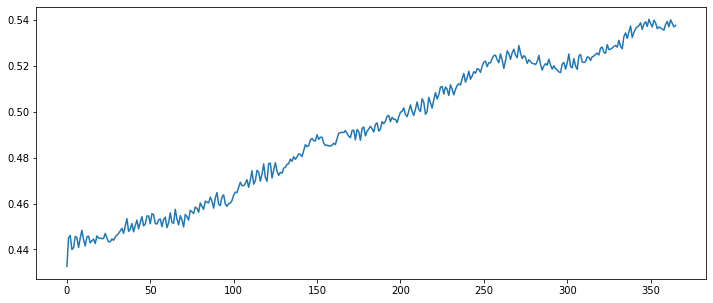

In [107]:

fig = plt.figure(figsize=(12,5))
plt.plot(speed_all[6])
plt.show()